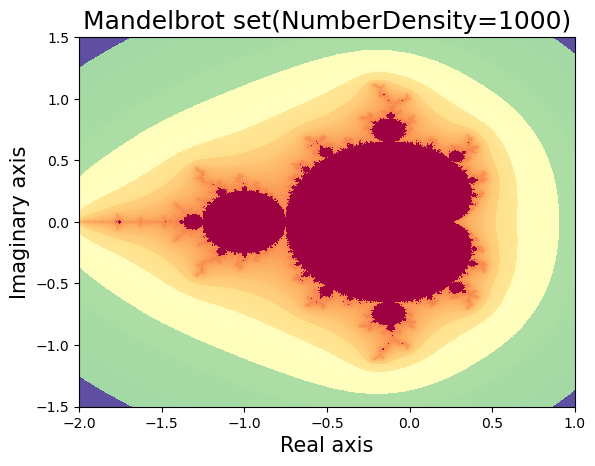

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def pixel(x:float, y:float, maxIteration: int=100) -> int:
    x0=x
    y0=y
    x2=x*x
    y2=y*y
    iteration=1
    while x2+y2<(1 << 16) and iteration < maxIteration:
        y=2*x*y+y0
        x=x2-y2+x0
        x2=x*x
        y2=y*y
        iteration+=1
    mu=0
    if iteration<maxIteration:
        log_zn=np.log10(x2+y2)/2
        mu=np.log10(log_zn/np.log10(2))/np.log10(2)
    return iteration, mu

class Mandelbrot:
    def __init__(self, realMin, realMax, imageMin, imageMax, numberDensity=1001, maxIteration=100):
        self.numberDensity=numberDensity
        self.maxIteration=maxIteration
        self.realAxis=np.linspace(realMin, realMax, numberDensity)
        self.imageAxis=np.linspace(imageMin, imageMax, numberDensity)
        self.iterations=np.zeros((numberDensity, numberDensity), dtype='int')
        self.nu=np.zeros((numberDensity, numberDensity))
        self.colorNumber=np.zeros((numberDensity, numberDensity))
    def getIters(self):
        for i, x0 in enumerate(self.realAxis):
            for j, y0 in enumerate(self.imageAxis):
                self.iterations[j,i], self.nu[j,i]=pixel(x0, y0, self.maxIteration)
    def getColor(self):                
        pixelNumber=np.zeros((1, self.maxIteration+1), dtype='int')
        for j in range(self.numberDensity):
            for k in range(self.numberDensity):
                i=self.iterations[j,k]
                pixelNumber[0,i]+=1
        total=0
        for i in pixelNumber[0,:]:
            total+=i
        for j in range(self.numberDensity):
            for k in range(self.numberDensity):
                for i in range(self.iterations[j,k]+1):
                    self.colorNumber[j,k]+=pixelNumber[0,i]/total
    def histColor(self):
        plt.pcolormesh(self.realAxis, self.imageAxis, self.colorNumber, cmap='Spectral_r')
        plt.xlabel('Real axis', fontsize=15)
        plt.ylabel('Imaginary axis', fontsize=15)
        plt.title(f'Mandelbrot set(NumberDensity={numberDensity-1})', fontsize=18)
        plt.show()
    def smoothColor(self):
        plt.pcolormesh(self.realAxis, self.imageAxis, self.colorNumber-self.nu/50, cmap='Spectral_r')
        plt.xlabel('Real axis', fontsize=15)
        plt.ylabel('Imaginary axis', fontsize=15)
        plt.title(f'Mandelbrot set(NumberDensity={self.numberDensity-1})', fontsize=18)
        plt.show()
        
mandelbrot1=Mandelbrot(-2, 1, -1.5, 1.5)
mandelbrot1.getIters()
mandelbrot1.getColor()
mandelbrot1.smoothColor()